# Podstawy Sztucznej Inteligencji 2018/2019



Prosze uzupelnic kod tam gdzie znajduje napis `YOUR CODE HERE` lub 'YOUR ANSWER HERE'.

Warto zresetowac 'kernel' i sprawdzic czy caly notatnik uruchamiany od poczatku nie daje bledow.

---

## Perceptron, zagadnienie dualne i kernel trick!

### Wstęp.

**Perceptron:**

Mamy $m$ przykładów  danych $\mathbf{x_i}$ i ich klasy  $y_i\in\{-1,1\}$. Chcemy znaleźć klasyfikator liniowy z granica decyzyją:

$$ \mathbf{w} \cdot\mathbf{x}-t$$ 

 - jeśli $ \mathbf{w} \cdot\mathbf{x}-t >= 0$ to $\mathbf{x}$ należy do klasy $y=+1$
 - jeśli $ \mathbf{w} \cdot\mathbf{x}-t < 0$ to $\mathbf{x}$ należy do klasy $y=-1$
 
 



$$\hat{y} =  \mathrm{sign} (\mathbf{w} \cdot\mathbf{x}-t)$$

 
Niech dla pewnego przykładu $\mathbf{x_i}$ z $y_i=+1$ klasyfikator będzie dawał wynik negatywny:

$$\mathbf{w} \cdot\mathbf{x}-t<0 $$

Dodajmy do wag wektor proporcjonalny do $\mathbf{x_i}$

 $\mathbf{w} \to \mathbf{w} + \eta \mathbf{x_i}$
 
wtedy  

  $(\mathbf{w} + \eta \mathbf{x_i})\mathbf{x_i} = \mathbf{w}\mathbf{x_i} + \eta  \underbrace{\mathbf{x_i}\mathbf{x_i}}_{>0}$

Ostatni wyraz jest zawsze dodatni - czyli możemy liczyć że w jakims momencie poprawimy wynik. 
 
W przypadku negatywnego przykładu musimy dodać $ -\eta \mathbf{x_i}$, co można zapisać jednym wspólnym wyrażeniem: 
 
  $\mathbf{w} \to \mathbf{w} + \eta y_i\mathbf{x_i}$
 

**Uwagi:**
 
 
 $\mathbf{w}\mathbf{x}+b$ oznacza to samo co  $\mathbf{w}\mathbf{x}$, gdzie $w_3=b$ i $x_{i3}=1$.
 
 
 Równoważne postacie algorytmu:
 
 - $\mathbf{w} \to \mathbf{w} + y_i\mathbf{x_i}$ 
 
 - $\mathbf{w} \to \mathbf{w} + y_i\mathbf{x_i}$ oraz  $b \to b+ y_i$; 
 

 
 

### Dane i funkcje pomocnicze.

In [2]:
%matplotlib inline 
import numpy as np 
import matplotlib.pyplot as plt
from IPython.display import  clear_output

In [3]:
def plot(x,y,w,grid=20):
    X,Y = np.meshgrid(*(2*(np.linspace(-2,2,grid),)))
    xx = np.stack([X.flatten(),Y.flatten()] ).T
    plt.figure(figsize=(6,6))
    plt.imshow(np.sign(np.dot(xx,w[:2]).reshape(grid,grid) + w[2]),vmin=0,vmax=1,extent=[-2,2,-2,2],origin='lower')
    plt.plot(x[y==-1,0],x[y==-1,1],'bo')
    plt.plot(x[y==1,0],x[y==1,1],'ro')
    
    plt.xlim(-2,2)
    plt.ylim(-2,2)


    plt.show()

In [4]:
def plot_dual(x,y,a,grid=20):
    
    X,Y = np.meshgrid(*(2*(np.linspace(-2,2,grid),)))
    xx = np.stack([X.flatten(),Y.flatten()] ).T
    plt.figure(figsize=(6,6))
    D = np.array([np.sign(np.sum(a*y*(x.dot(np.append(xi,1)))**2 )) for xi in xx]).reshape(grid,grid)

    plt.imshow(D,vmin=0,vmax=1,extent=[-2,2,-2,2],origin='lower')
    plt.plot(x[y==-1,0],x[y==-1,1],'bo')
    plt.plot(x[y==1,0],x[y==1,1],'ro')
    
    phi = np.linspace(0,2*np.pi,100)
    plt.plot(np.cos(phi),np.sin(phi),'-')
    
    plt.xlim(-2,2)
    plt.ylim(-2,2)


    
    plt.show()

In [5]:
x = np.array([[-1.09066101, -0.86272135],
       [ 0.58735437,  1.57663515],
       [-1.26868118, -0.74413244],
       [ 1.22562345,  1.63767613],
       [-0.57747687, -0.92826376],
       [-0.84670698, -0.87433919],
       [-0.87775029, -1.63551329],
       [ 0.74052768,  0.93450765],
       [-0.34090589, -0.01919098],
       [-0.57684532, -1.07264614],
       [-1.46026479, -0.49299091],
       [ 1.31762568,  1.12592783],
       [ 1.17491385,  0.4503533 ],
       [ 0.58115165,  0.05114449],
       [ 0.75466739,  0.53756566],
       [ 0.85182984,  0.16593927],
       [-1.09286342, -0.83112391],
       [ 0.88414066,  0.34155105],
       [-1.34886615, -1.12314569],
       [ 1.36318734,  1.76276714]])

x += 0.94*np.ones((1,2))
x /= 1.3
x = np.vstack([x.T,np.ones(x.shape[0])]).T
y = np.array([1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0])

y[y==0] = -1
y

array([ 1, -1,  1, -1,  1,  1,  1, -1,  1,  1,  1, -1, -1, -1, -1, -1,  1,
       -1,  1, -1])

In [6]:
N = 2
w = np.ones(N+1)
m = x.shape[0]
m,N

(20, 2)

In [7]:
x

array([[-0.11589308,  0.05944512,  1.        ],
       [ 1.17488798,  1.93587319,  1.        ],
       [-0.25283168,  0.15066735,  1.        ],
       [ 1.66586419,  1.98282779,  1.        ],
       [ 0.27886395,  0.00902788,  1.        ],
       [ 0.07176386,  0.05050832,  1.        ],
       [ 0.04788439, -0.53501022,  1.        ],
       [ 1.2927136 ,  1.44192896,  1.        ],
       [ 0.46084162,  0.70831463,  1.        ],
       [ 0.27934975, -0.10203549,  1.        ],
       [-0.40020368,  0.34385315,  1.        ],
       [ 1.73663514,  1.58917525,  1.        ],
       [ 1.62685681,  1.06950254,  1.        ],
       [ 1.17011665,  0.76241884,  1.        ],
       [ 1.3035903 ,  1.13658897,  1.        ],
       [ 1.37833065,  0.85072252,  1.        ],
       [-0.11758725,  0.08375084,  1.        ],
       [ 1.40318512,  0.9858085 ,  1.        ],
       [-0.31451242, -0.1408813 ,  1.        ],
       [ 1.77168257,  2.07905165,  1.        ]])

### Perceptron algorytm I

 - jesli $\mathbf{w} = 0 $ to $\eta$ nie wpływa na prędkość trenowania. 
 - używamy modelu $\mathbf{w x} = 0$ z ostatnią aktywacją równą zawsze jeden (sztuczny bias).
 
 
 

In [48]:
#  bias in weights (last feature == 1 )
eta = 1
w = np.ones(N+1)*0
hist  = [ ]
OK = False
for k in range(35):
    OK = True
    for xi,yi in zip(x,y): 
        if yi*w.dot(xi) <= 0:
            w += 0
            w+=eta*yi*xi
#             clear_output(wait=True)
#             plot(x,y,w,grid=100)
            OK = False
            #print(OK,np.sum([ y1*w.dot(xi) != 1 for xi,yi in zip(x,y)]))
     
        hist.append([k,*list(w)])
    if OK:
        print("OK(",k,") ",xi)
        break
        
print(OK,w)
# from pprint import pprint 
# pprint(hist)



OK( 2 )  [1.77168257 2.07905165 1.        ]
True [-1.26035052 -1.21318978  2.        ]


In [10]:
np.testing.assert_allclose([-1.26035052, -1.21318978, 2. ],w,rtol=1e-3)

np.testing.assert_equal(np.sign(x.dot(w)), y)

#### sklearn SVM

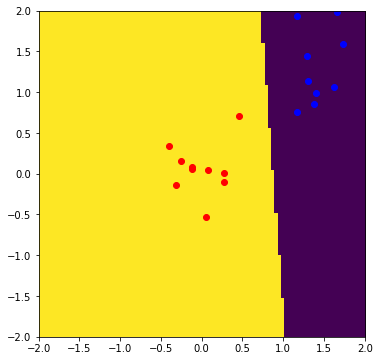

In [11]:
from sklearn.svm import SVC
svm = SVC(kernel="linear", C=120, shrinking=False)
svm.fit(x[:,:],y)
plot(x,y,np.append(svm.coef_[0][:2],svm.intercept_),grid=100)

In [12]:
np.linalg.norm(svm.coef_[0][:]),svm.intercept_

(2.8116121725954524, array([2.44342839]))

### Dual form - algorytm II

Jeśli $\eta=1$ tj.  $\mathbf{w} \to \mathbf{w} +  \mathbf{x_i}$

i  $\mathbf{w} = 0 $ na starcie to mamy:
$$\mathbf{w} = \sum_{i=1}^m \alpha_i y_i \mathbf{x_i} $$

gdzie $\alpha$ to liczba pomyłek "korygowanych" przez algorytm.

 - $\alpha_i$ to "instance weights" 
 - wynik zależy od kolejności pętli po przykładach
 - $\alpha_i$ są całkowite
 - klasyfikator zależy od wyrażenia:
 
 
 $$\hat{y} = \mathrm{sign} (\sum_{i=1}^m \alpha_i y_i \mathbf{x_i}\cdot{\mathbf{x}}) $$
 
**Algorytm**
 
 dla każdego źle zaklasyfikowanego przykładu wykonaj:
 $$\alpha_i \to \alpha_i  + 1 $$

In [ ]:
#y[10] = -1  # non-separable
#y[10] = 1 # separable

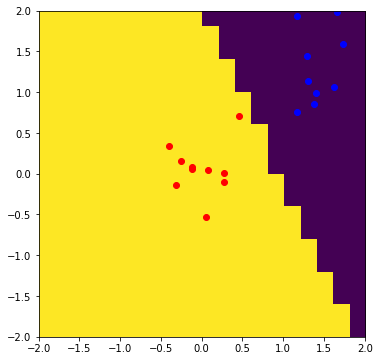

1 16 [-2.03200584 -0.93048979  2.        ] 8.994858981130593


In [13]:
import time 
a = np.zeros(x.shape[0])
w = np.zeros(N+1)


perm = np.random.choice(m,m,replace=False)
x = x[perm]
y = y[perm]

plot(x,y,w)

for k in range(5):
  
    for i,(xi,yi) in enumerate(zip(x,y)): 
        if yi*np.sum(a*y*x.dot(xi)) <= 0:
            a[i] += 0

            a[i] +=1

            w = np.dot(a*y,x)
            clear_output(wait=True)
            
            plot(x,y,w)
            
            print(k,i,w,np.sum(w**2)) 
            time.sleep(0.2)
            
        if np.all(np.sign(x.dot(w)) == y):
            break
    if np.all(np.sign(x.dot(w)) == y):
        break




In [15]:
w = np.dot(a*y,x)
np.testing.assert_equal(np.sign(x.dot(w)), y)

### Kernel trick!

Ponieważ algorytm w postaci dualnej zależy tylko do iloczynów $\mathbf{x_i}\cdot\mathbf{x_j}$ to można zauważyć, że np. zastąpienie tego iloczynu pewną funkcją jest ekwiwalentem dodania nowych cech do układu:

Na przykład rozważmy:

$\mathbf{x_i}\cdot\mathbf{x_j} \to K(\mathbf{x_i}\cdot\mathbf{x_j}) = (\mathbf{x_i}\cdot\mathbf{x_j})^2$

W dwóch wymiarach mamy:

 $$ (\mathbf{x_i}\cdot\mathbf{x_j})^2 = (x_i x_j + y_i y_j)^2 = x_i^2 x_j^2 + y_i^2 y_j^2 + 2 x_i x_j y_i y_j  $$
 
Weżmy transformację $\phi(\mathbf{x}) = (x^2,y^2,\sqrt{2} x y)$, wtedy:


$$ \phi(\mathbf{x_i}) \cdot \phi(\mathbf{x_j})  = x_i^2 x_j^2 + y_i^2 y_j^2 + 2 x_i x_j y_i y_j $$

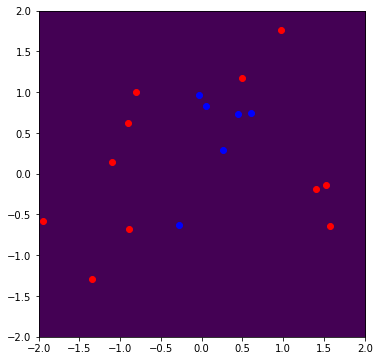

In [16]:
m = 20
x = np.random.randn(m,2)/1.
y = np.ones(m)
w = np.zeros(N+1)
y[np.sum(x**2,axis=1)<1.] = -1
x = np.vstack([x.T,np.ones(x.shape[0])]).T
plot(x,y,w)



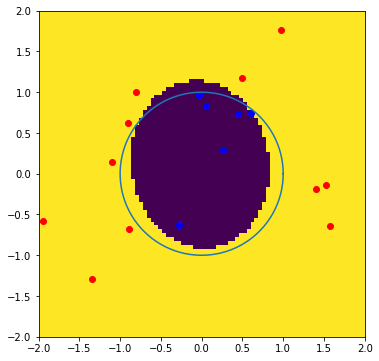

In [20]:
import time 
a = np.zeros(x.shape[0])
w = np.zeros(N+1)

perm = np.random.choice(m,m,replace=False)
x = x[perm]
y = y[perm]

plot_dual(x,y,a)

for k in range(215):
  
    for i,(xi,yi) in enumerate(zip(x,y)): 
        if yi*np.sum(a*y*(x.dot(xi))**2) <=0:
            a[i]+= 1
            clear_output(wait=True)
            plot_dual(x, y, a, grid = 85)
            time.sleep(0.01)
        pass
        



In [21]:
yhat=[np.sign(np.sum((ai*yi*np.dot(xi,xj)**2) for ai,yi,xi in zip(a,y,x))) for xj in x]
np.testing.assert_array_equal( yhat, y ) 